## Imports

In [172]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import eli5
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
#from utils.plotter import plot_SVM_DecisionBoundary
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, f1_score
from pandas.api.types import CategoricalDtype
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)

## Importance by each class

In [177]:
# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )
    return out

## Bar Chart Formatters

In [178]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Emojis on Bar Chart Function

In [179]:
def bar_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Load csvs

In [2]:
path_counts_ran = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv'
path_users_ran = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'
counts_df_ran = pd.read_csv(path_counts_ran,index_col=None, header=0, low_memory = False)
users_df_ran = pd.read_csv(path_users_ran,index_col=None, header=0, low_memory = False)

path_counts_lon = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/london_per_user_emoji_counts.csv'
path_users_lon = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'
counts_df_lon = pd.read_csv(path_counts_lon,index_col=None, header=0, low_memory = False)
users_df_lon = pd.read_csv(path_users_lon,index_col=None, header=0, low_memory = False)

path_counts_joh = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/joh_per_user_emoji_counts.csv'
path_users_joh = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'
counts_df_joh = pd.read_csv(path_counts_joh,index_col=None, header=0, low_memory = False)
users_df_joh = pd.read_csv(path_users_joh,index_col=None, header=0, low_memory = False)

path_counts_nyc = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/nyc_per_user_emoji_counts.csv'
path_users_nyc = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'
counts_df_nyc = pd.read_csv(path_counts_nyc,index_col=None, header=0, low_memory = False)
users_df_nyc = pd.read_csv(path_users_nyc,index_col=None, header=0, low_memory = False)

In [3]:
# Append counts from all Locations
counts = counts_df_ran.append(counts_df_lon, sort=False,ignore_index=True).append(counts_df_joh, sort=False,ignore_index=True).append(counts_df_nyc, sort=False,ignore_index=True)
print(counts.shape)

# Append users from all Locations
users = users_df_ran.append(users_df_lon, sort=False,ignore_index=True).append(users_df_joh, sort=False,ignore_index=True).append(users_df_nyc, sort=False,ignore_index=True)
print(users.shape)

# Fill NaN with 0.0
counts = counts.fillna(0.0)

(40000, 2579)
(40000, 28)


In [4]:
# Preview counts
counts.describe()

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🧗🏻‍♂️,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.0000,40000.0000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0000,40000.0000,40000.000000,40000.000000,40000.00000
mean,0.000025,0.000050,0.000225,0.000300,0.000225,0.000075,0.00020,0.0001,0.0001,0.000050,...,0.000050,0.000075,0.000100,0.000100,0.000125,0.0002,0.0002,0.000225,0.000075,0.00005
std,0.005000,0.007071,0.035707,0.031622,0.022912,0.011180,0.01581,0.0100,0.0100,0.007071,...,0.007071,0.015000,0.015811,0.015811,0.018028,0.0400,0.0400,0.045000,0.015000,0.01000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,5.000000,3.000000,2.000000,2.00000,1.0000,1.0000,1.000000,...,1.000000,3.000000,3.000000,3.000000,3.000000,8.0000,8.0000,9.000000,3.000000,2.00000


## % Feuture representation

In [5]:
# Feature % representation
for index, row in counts.iterrows():
    counts.loc[index] = counts.loc[index]/counts.loc[index].sum()
counts.describe()

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🧗🏻‍♂️,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺
count,2.722600e+04,2.722600e+04,27226.000000,27226.000000,2.722600e+04,2.722600e+04,2.722600e+04,2.722600e+04,27226.000000,2.722600e+04,...,2.722600e+04,2.722600e+04,27226.000000,2.722600e+04,27226.000000,27226.000000,2.722600e+04,27226.000000,2.722600e+04,2.722600e+04
mean,2.836262e-08,1.853382e-07,0.000004,0.000001,4.870087e-07,1.662974e-07,3.372688e-07,6.847104e-07,0.000001,4.770146e-07,...,3.034764e-07,2.123098e-07,0.000001,7.417875e-07,0.000004,0.000007,4.848792e-07,0.000001,7.395221e-07,1.958912e-07
std,4.679919e-06,2.930671e-05,0.000589,0.000101,3.824005e-05,1.959546e-05,2.310104e-05,7.042348e-05,0.000108,7.168357e-05,...,4.115603e-05,3.503176e-05,0.000146,1.045872e-04,0.000638,0.001128,8.000653e-05,0.000192,1.220234e-04,3.232264e-05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
max,7.722008e-04,4.830918e-03,0.097222,0.012594,3.984064e-03,2.583979e-03,2.403846e-03,8.474576e-03,0.013699,1.176471e-02,...,6.578947e-03,5.780347e-03,0.023438,1.694915e-02,0.105263,0.186047,1.320132e-02,0.031690,2.013423e-02,5.333333e-03


## Add gender labels

In [6]:
# Add gender column
gender_counts_df = counts 
gender_counts_df['gender'] = users['gender']
gender_counts_df = gender_counts_df.dropna()

In [7]:
# Preview counts with gender labels
gender_counts_df

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺,gender
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female


In [8]:
# Count males and Females
gender_counts_df['gender']
males_count = 0
females_count = 0

for i in gender_counts_df['gender']:
    if i == 'female':
        females_count = females_count+1
    if i == 'male':
        males_count = males_count+1
print("Males: {}".format(males_count))
print("Females: {}".format(females_count))

Males: 7521
Females: 8484


In [9]:
# Female -> 0
# Male -> 1
gender_counts_df = gender_counts_df.replace('female', 0)
gender_counts_df = gender_counts_df.replace('male', 1)
gender_counts_df

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺,gender
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [187]:
X = gender_counts_df.drop(columns=['gender'])
y = gender_counts_df['gender']

## Random Forest Model

In [189]:
# Fit an Extra Trees model to the data
tree_model = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state = 42,max_depth=55)
tree_model.fit(X,y)

# Display the relative importance of each attribute
print(tree_model.feature_importances_)
tree_model_imp = tree_model.feature_importances_

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.08446790e-06
 1.05506083e-07 0.00000000e+00]


In [190]:
result = class_feature_importance(X, y, tree_model_imp)

In [191]:
tree_model_importance_female_pd = pd.DataFrame(columns = ['Emoji','Importance'])

# 0 for female
for emoji_key in (result[0]):
    tree_model_importance_female_pd = tree_model_importance_female_pd.append({'Emoji' : X.columns[emoji_key] , 'Importance' : result[0][emoji_key]} , ignore_index=True)
    
# Sort dataframe 
tree_model_importance_female_pd = tree_model_importance_female_pd.sort_values(by=['Importance'])
tree_model_importance_female_pd.tail(20)

,Emoji,Importance
2307,🤗,0.000302
2329,🙄,0.000361
2328,💗,0.000387
2322,💛,0.000387
2225,💃,0.000467
2122,🤦🏾‍♀️,0.000474
2244,🤦🏻‍♀️,0.000525
2323,💔,0.000610
2058,🤷🏾‍♀️,0.000666
2340,✨,0.000706


In [192]:
tree_model_importance_male_pd = pd.DataFrame(columns = ['Emoji','Importance'])

# 1 for male
for emoji_key in (result[1]):
    tree_model_importance_male_pd = tree_model_importance_male_pd.append({'Emoji' : X.columns[emoji_key] , 'Importance' : result[1][emoji_key]} , ignore_index=True)
    
# Sort dataframe 
tree_model_importance_male_pd = tree_model_importance_male_pd.sort_values(by=['Importance'])
tree_model_importance_male_pd.tail(20)

,Emoji,Importance
2297,👌,0.000215
2315,😉,0.000243
2287,💯,0.000247
2343,🤣,0.000259
2319,😅,0.000290
2311,👀,0.000357
2051,🤷‍♂️,0.000368
2190,🤦🏻‍♂️,0.000371
2139,🤦‍♂️,0.000418
2313,😎,0.000470


## Top 15 Dinstinct Emojis by Gender

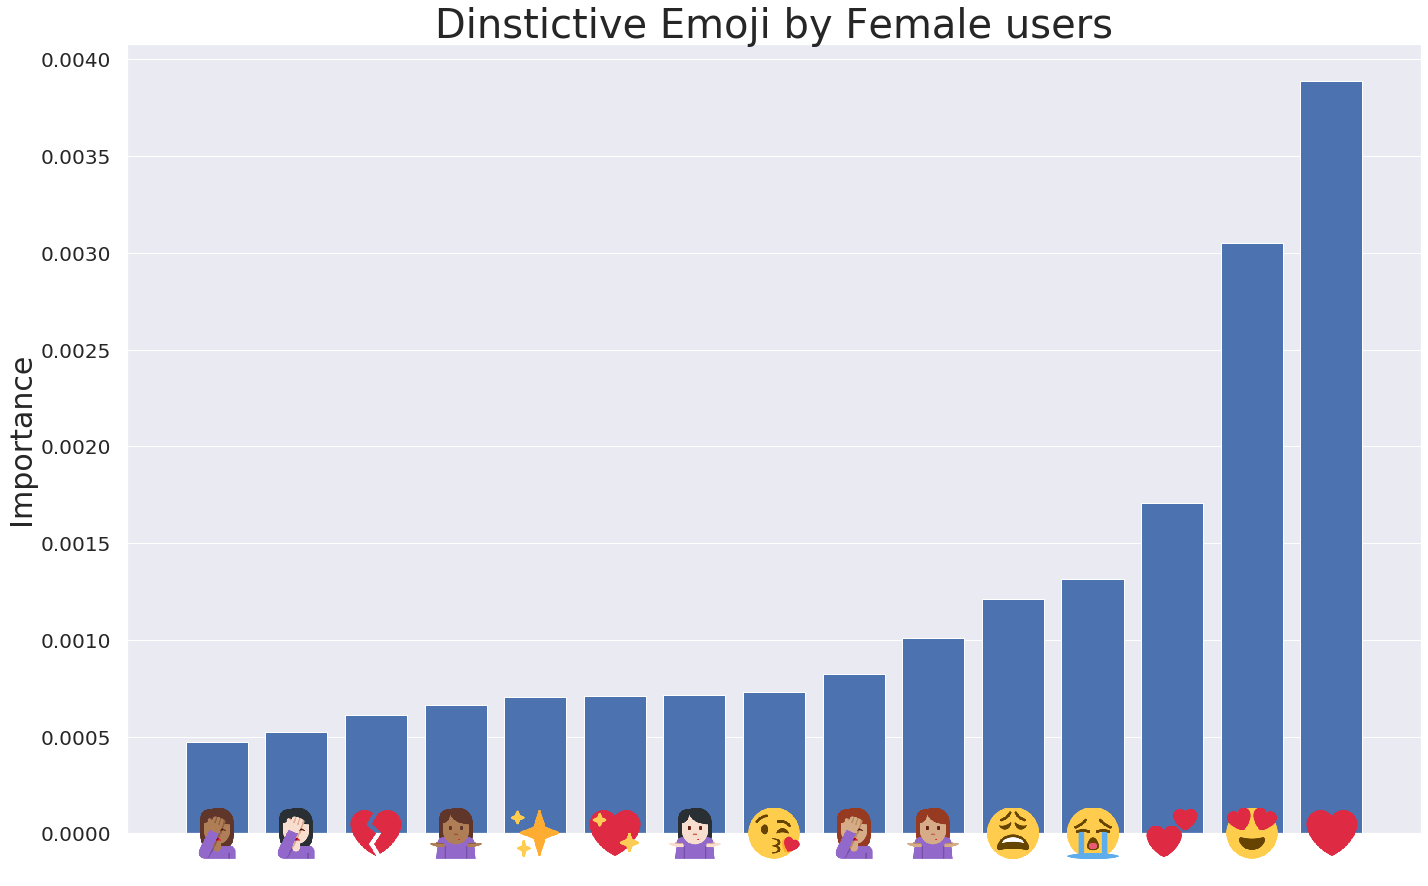

In [193]:
# Top 15 Values
x_g = tree_model_importance_female_pd['Emoji'].tail(15).values
y_g = tree_model_importance_female_pd["Importance"].tail(15).values

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
#ax.yaxis.set_major_formatter(formatter_percentage)
ax.tick_params(axis='both', which='major', pad=10)
# ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_g, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Importance', fontsize =30)
plt.title('Dinstictive Emoji by Female users', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x_g)

plt.show()

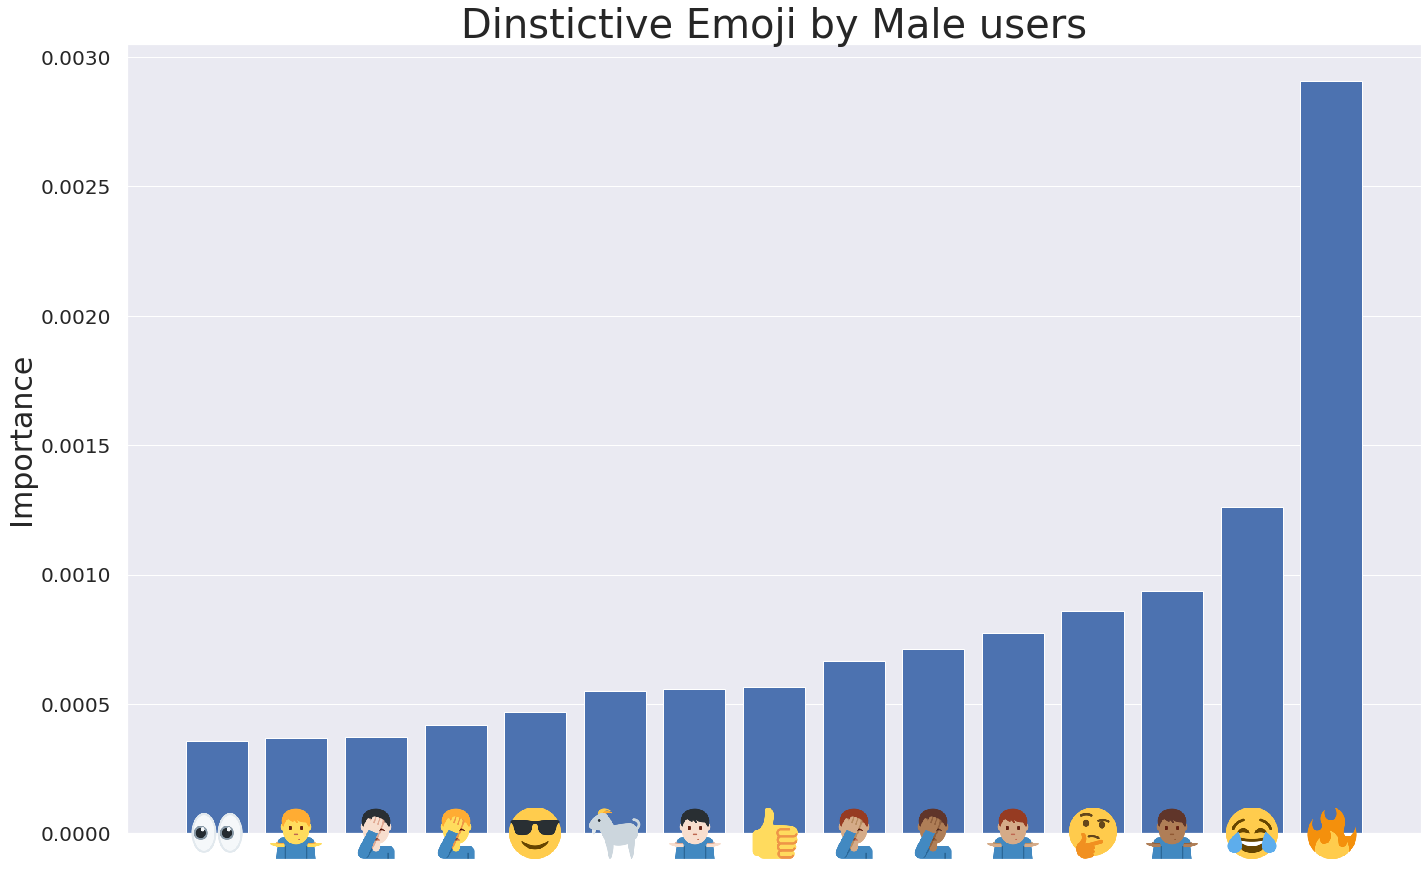

In [194]:
# Top 15 Values
x_g = tree_model_importance_male_pd['Emoji'].tail(15).values
y_g = tree_model_importance_male_pd["Importance"].tail(15).values

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
#ax.yaxis.set_major_formatter(formatter_percentage)
ax.tick_params(axis='both', which='major', pad=10)
# ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_g, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Importance', fontsize =30)
plt.title('Dinstictive Emoji by Male users', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x_g)

plt.show()